The original dataset is a multivariate dataset with 303 observations and 75 attributes. However the dataset gotten from the Kaggle website only has 14 of the attributes. 

The target has binary values ( Value 0: < 50% diameter narrowing, Value 1: > 50% diameter narrowing).

To predict the target values, logistic regression machine learning technique will be used, as this is considered to a binary classification problem.


**Data Attributes used:**

3 age: age in years

4 sex: sex (1 = male; 0 = female)

9 cp: chest pain type

-- Value 1: typical angina

-- Value 2: atypical angina

-- Value 3: non-anginal pain

-- Value 4: asymptomatic

10 trestbps: resting blood pressure (in mm Hg on admission to the hospital)

12 chol: serum cholestoral in mg/dl

16 fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

19 restecg: resting electrocardiographic results

-- Value 0: normal

-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria


32 thalach: maximum heart rate achieved

33 thalrest: resting heart rate

38 exang: exercise induced angina (1 = yes; 0 = no)

40 oldpeak = ST depression induced by exercise relative to rest

41 slope: the slope of the peak exercise ST segment

-- Value 1: upsloping

-- Value 2: flat

-- Value 3: downsloping


44 ca: number of major vessels (0-3) colored by flourosopy

51 thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

58 num: diagnosis of heart disease (angiographic disease status)

-- Value 0: < 50% diameter narrowing

-- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)


## 1.1 Data Source: 

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

https://www.kaggle.com/ronitf/heart-disease-uci#__sid=js0

Citation:

The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. They would be:
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.


## 1.2 Python Libraries

 To develop and execute the logistic regression modelling, we are going to be the using the following libraries:



*   pandas to load the dataset and manipulate the data.
*   matplotlib.pyplot and IPython for interactive development and to create data visualizations.

*   sckit-learn as the machine learning library with supporting libraries - NumPy .





In [0]:
### machine learning scikit-learn, classes and supporting libraries
import numpy as np

from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


### data exploration and manipulation
import pandas as pd


### interactive development, plots and visuals
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1.3 Import Files and transform data

In [0]:
### import file
from google.colab import files

uploaded = files.upload()

Saving heart.csv to heart.csv


In [0]:
### load to dataframe

import io
heart = pd.read_csv(io.StringIO(uploaded['heart.csv'].decode("utf-8")), delimiter=",")
print(heart)

     age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0     63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1     37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2     41    0   1       130   204    0  ...      0      1.4      2   0     2       1
3     56    1   1       120   236    0  ...      0      0.8      2   0     2       1
4     57    0   0       120   354    0  ...      1      0.6      2   0     2       1
..   ...  ...  ..       ...   ...  ...  ...    ...      ...    ...  ..   ...     ...
298   57    0   0       140   241    0  ...      1      0.2      1   0     3       0
299   45    1   3       110   264    0  ...      0      1.2      1   0     3       0
300   68    1   0       144   193    1  ...      0      3.4      1   2     3       0
301   57    1   0       130   131    0  ...      1      1.2      1   1     3       0
302   57    0   1       130   236    0  ...      0      0.0      

In [0]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### 1.3.1 Check for outliers, null values, explore data

In [0]:
## check for missing values
 heart.apply(lambda x: sum(x.isnull()),axis=0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [0]:
## check overall dataset info

heart.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


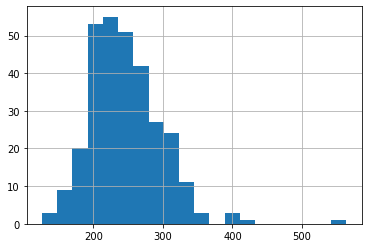

In [0]:
## lets check the value distribution of the cholesterol column

heart['chol'].hist(bins=20)

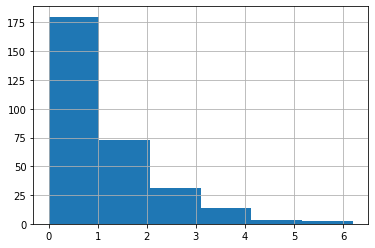

In [0]:
## lets check the value distribution of the oldpeak column

heart['oldpeak'].hist(bins=6)

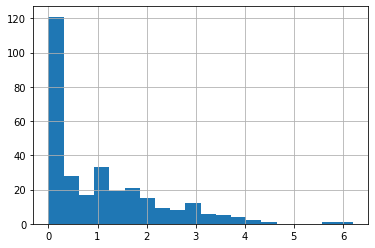

In [0]:
## lets check the value distribution of the oldpeak column

heart['oldpeak'].hist(bins=20)

In [0]:
## lets check the rows that has this outlier chol > 500 or oldpeak > 5

heart.loc[(heart['chol'] > 500) | (heart['oldpeak'] > 5)]

## looking at the data, oldpeak and slope ST depression, values for slope are supposed to be only 1-3 not zero, which tells me data may not be fully reliable for these two rows. 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0


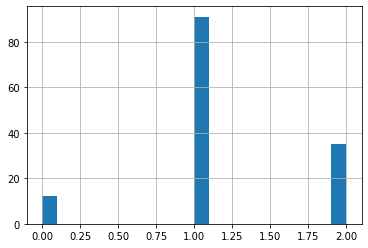

In [0]:
## lets check the value of the distribution of the slope column when target is equal to zero

heart['slope'].loc[(heart['target'] == 0)].hist(bins=20)



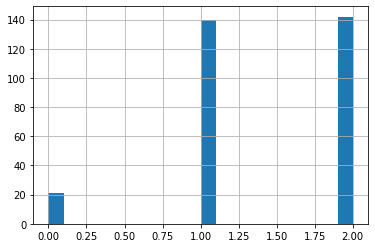

In [0]:
## lets check the value distribution of the slope column overall

heart['slope'].hist(bins=20)

In [0]:
## lets check the rows that has this slope ==0

heart.loc[(heart['slope']== 0)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
17,66,0,3,150,226,0,1,114,0,2.6,0,0,2,1
29,53,1,2,130,197,1,0,152,0,1.2,0,0,2,1
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2,1
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
103,42,1,2,120,240,1,1,194,0,0.8,0,0,3,1
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2,1
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0


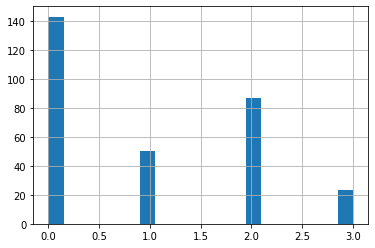

In [0]:
## lets check value distribution of chestpain cp
heart['cp'].hist(bins=20)

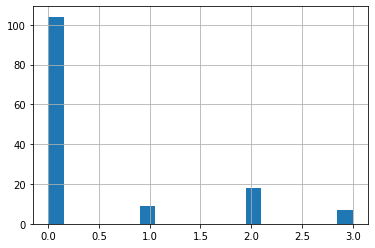

In [0]:
## looking at the data there seems to be a huge correlation between not having chest pain i.e. ==0 and target ==0
heart['cp'].loc[(heart['target'] == 0)].hist(bins=20)

### 1.3.2 Transform Data

#### Looking at the charts above, it tells me that due to high number of cp and slope where the values are equal to 0, are not necessarily errors, but the tests were not taken or not applicable. 


In [0]:
## Assumed list of input variables as features
indep_variables = list(heart.columns.values[0:13]) ## for training set
display(indep_variables)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [0]:
### Assumed target as dependent variable

dep_variables = list(heart.columns.values[13:])

display(dep_variables)

['target']

In [0]:
### split dataset into features(x) and desired target(y) 

y = heart[dep_variables]  
x = heart[indep_variables]
print(x)
print(y)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]
     target
0         1
1         1
2         1
3         1
4         1
..      ...
298       0
299       0
300

### 1.3.3 Scale the Data

In [0]:
## normalize the following features (age, trestbps, chol, thalach, oldpeak) from x (the independent variables), create new dataframe X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(copy=True)

cols_normalize = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

## fit and transform these columns by centering and scaling using the fit_transform function

from sklearn.compose import ColumnTransformer

ct = ColumnTransformer([('scaler', StandardScaler(), (cols_normalize))], remainder='passthrough')

X = np.array(ct.fit_transform(x))

print(X)

[[ 0.9521966   0.76395577 -0.25633371 ...  0.          0.
   1.        ]
 [-1.91531289 -0.09273778  0.07219949 ...  0.          0.
   2.        ]
 [-1.47415758 -0.09273778 -0.81677269 ...  2.          0.
   2.        ]
 ...
 [ 1.50364073  0.70684287 -1.029353   ...  1.          2.
   3.        ]
 [ 0.29046364 -0.09273778 -2.2275329  ...  1.          1.
   3.        ]
 [ 0.29046364 -0.09273778 -0.19835726 ...  1.          1.
   2.        ]]


## 1.4 Build the Model

In [0]:
## split data using train_test_split from Model selection in sklearn

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)

In [0]:
## use the sklearn logistic model imported
model = LogisticRegression(solver='liblinear', multi_class= 'ovr', random_state=0)

## fit the model with data, change the shape of y to a 1d array instead of a column vector using .ravel()
model.fit(X_train,y_train.values.ravel())

## perform prediction on test set
y_pred=model.predict(X_test)

check model classes, intercept and coefficent

In [0]:


model.classes_

array([0, 1])

In [0]:
model.intercept_

array([1.43929172])

In [0]:
model.coef_

array([[-0.01191187, -0.18177715, -0.23169119,  0.43383666, -0.59126721,
        -1.54687884,  0.8693753 , -0.28601435,  0.23180581, -0.70715471,
         0.49971163, -0.75591369, -0.49123766]])

## 1.5 Evaluate the Model using Metrics from sklearn Library


In [0]:
## use confusion matrix to evaluate
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[24,  9],
       [ 4, 39]])

### 1.5.1 Visualize confusion matrix

Text(0.5, 257.44, 'Predicted label')

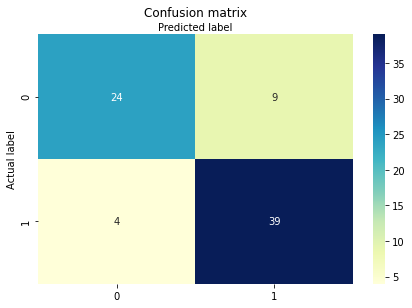

In [0]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')



True Positive (TP) = 24    False Negative(FN) = 9

False Positive (FP) = 4    True Negative (TN) = 39

### 1.5.2 Model Evaluation Metrics

Accuracy means how often is the classifier correct evaluated as (TP+TN)/total, 1 means best
Precision meaning how ofen would it not label a value that is negative positive, it is evaluated as TP/(TP+FP), 1 means best, 0 means bad

Recall otherwise known as sensitivity, what is the true positive rate evaluated as TP/(TP+FN), 1 means best, 0 means bad

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8289473684210527
Precision: 0.8125
Recall: 0.9069767441860465


### 1.5.3 ROC Curve

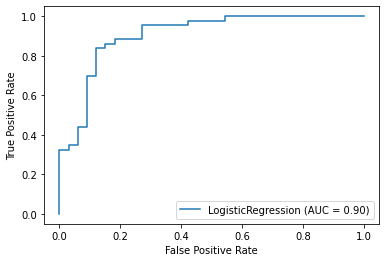

In [0]:
## plot true positive rate vs false positive rate

from sklearn.metrics import plot_roc_curve

logreg_disp = plot_roc_curve(model, X_test, y_test)
plt.show()

In [0]:
## create table showing the results
Accuracy = np.round_( (metrics.accuracy_score(y_test, y_pred) * 100), decimals=2)
Precision = np.round_((metrics.precision_score(y_test, y_pred) * 100),decimals=2)
Recall = np.round_((metrics.recall_score(y_test, y_pred) * 100), decimals=2)
                              
results_df = pd.DataFrame(data=[["Logistic Regression", Accuracy, Precision, Recall]], 
                          columns=['Model', 'Accuracy %', 'Precision %', 'Recall %'])
results_df

,Model,Accuracy %,Precision %,Recall %
0,Logistic Regression,82.89,81.25,90.7


## 1.6 Compare with other classifiers and plot the corresponding ROC curves

### 1.6.1 Compare with Support Vector Classifier

In [0]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc=SVC(random_state=0)
svc.fit(X_train, y_train.values.ravel())

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
## perform prediction on test set
y_pred=svc.predict(X_test)

In [0]:
## use confusion matrix to evaluate
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[23, 10],
       [ 2, 41]])

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8421052631578947
Precision: 0.803921568627451
Recall: 0.9534883720930233


In [0]:
## create table showing the results
Accuracy = np.round_( (metrics.accuracy_score(y_test, y_pred) * 100), decimals=2)
Precision = np.round_((metrics.precision_score(y_test, y_pred) * 100),decimals=2)
Recall = np.round_((metrics.recall_score(y_test, y_pred) * 100), decimals=2)
                              
results_df2 = pd.DataFrame(data=[["Support Vector Classifier", Accuracy, Precision, Recall]], 
                          columns=['Model', 'Accuracy %', 'Precision %', 'Recall %'])
results_df = results_df.append(results_df2, ignore_index=True)
results_df

,Model,Accuracy %,Precision %,Recall %
0,Logistic Regression,82.89,81.25,90.70
1,Support Vector Classifier,84.21,80.39,95.35


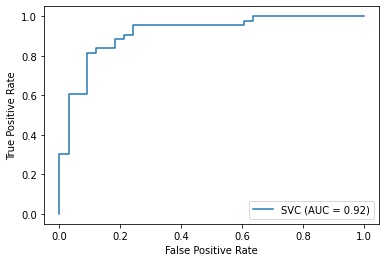

In [0]:
svc_disp = plot_roc_curve(svc, X_test, y_test)
plt.show()

## 1.6.2 Compare with Random Forest Classifier

In [0]:
from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
## perform prediction on test set
y_pred=rfc.predict(X_test)

In [0]:
## use confusion matrix to evaluate
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[24,  9],
       [ 4, 39]])

In [0]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8289473684210527
Precision: 0.8125
Recall: 0.9069767441860465


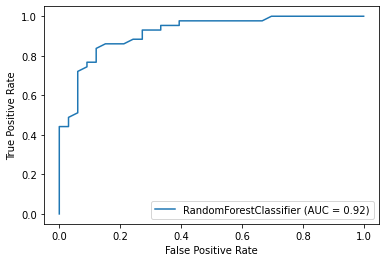

In [0]:
rfc_disp = plot_roc_curve(rfc, X_test, y_test)
plt.show()

AUC score of 1 typical means perfect, 0.5 means classifier cannot be used.



In [0]:
## create table showing the results
Accuracy = np.round_( (metrics.accuracy_score(y_test, y_pred) * 100), decimals=2)
Precision = np.round_((metrics.precision_score(y_test, y_pred) * 100),decimals=2)
Recall = np.round_((metrics.recall_score(y_test, y_pred) * 100), decimals=2)
                              
results_df3 = pd.DataFrame(data=[["Random Forest Classifier", Accuracy, Precision, Recall]], 
                          columns=['Model', 'Accuracy %', 'Precision %', 'Recall %'])
results_df = results_df.append(results_df3, ignore_index=True)
results_df

,Model,Accuracy %,Precision %,Recall %
0,Logistic Regression,82.89,81.25,90.70
1,Support Vector Classifier,84.21,80.39,95.35
2,Random Forest Classifier,82.89,81.25,90.70
